# <center>English Premier League(2020-21)</center>



Statistics of EPL 2020-21 season Players



Below you can see my analysis of the English Premier League (EPL) from season 2020/21. It contains mainly scripts and charts without detail explanation.



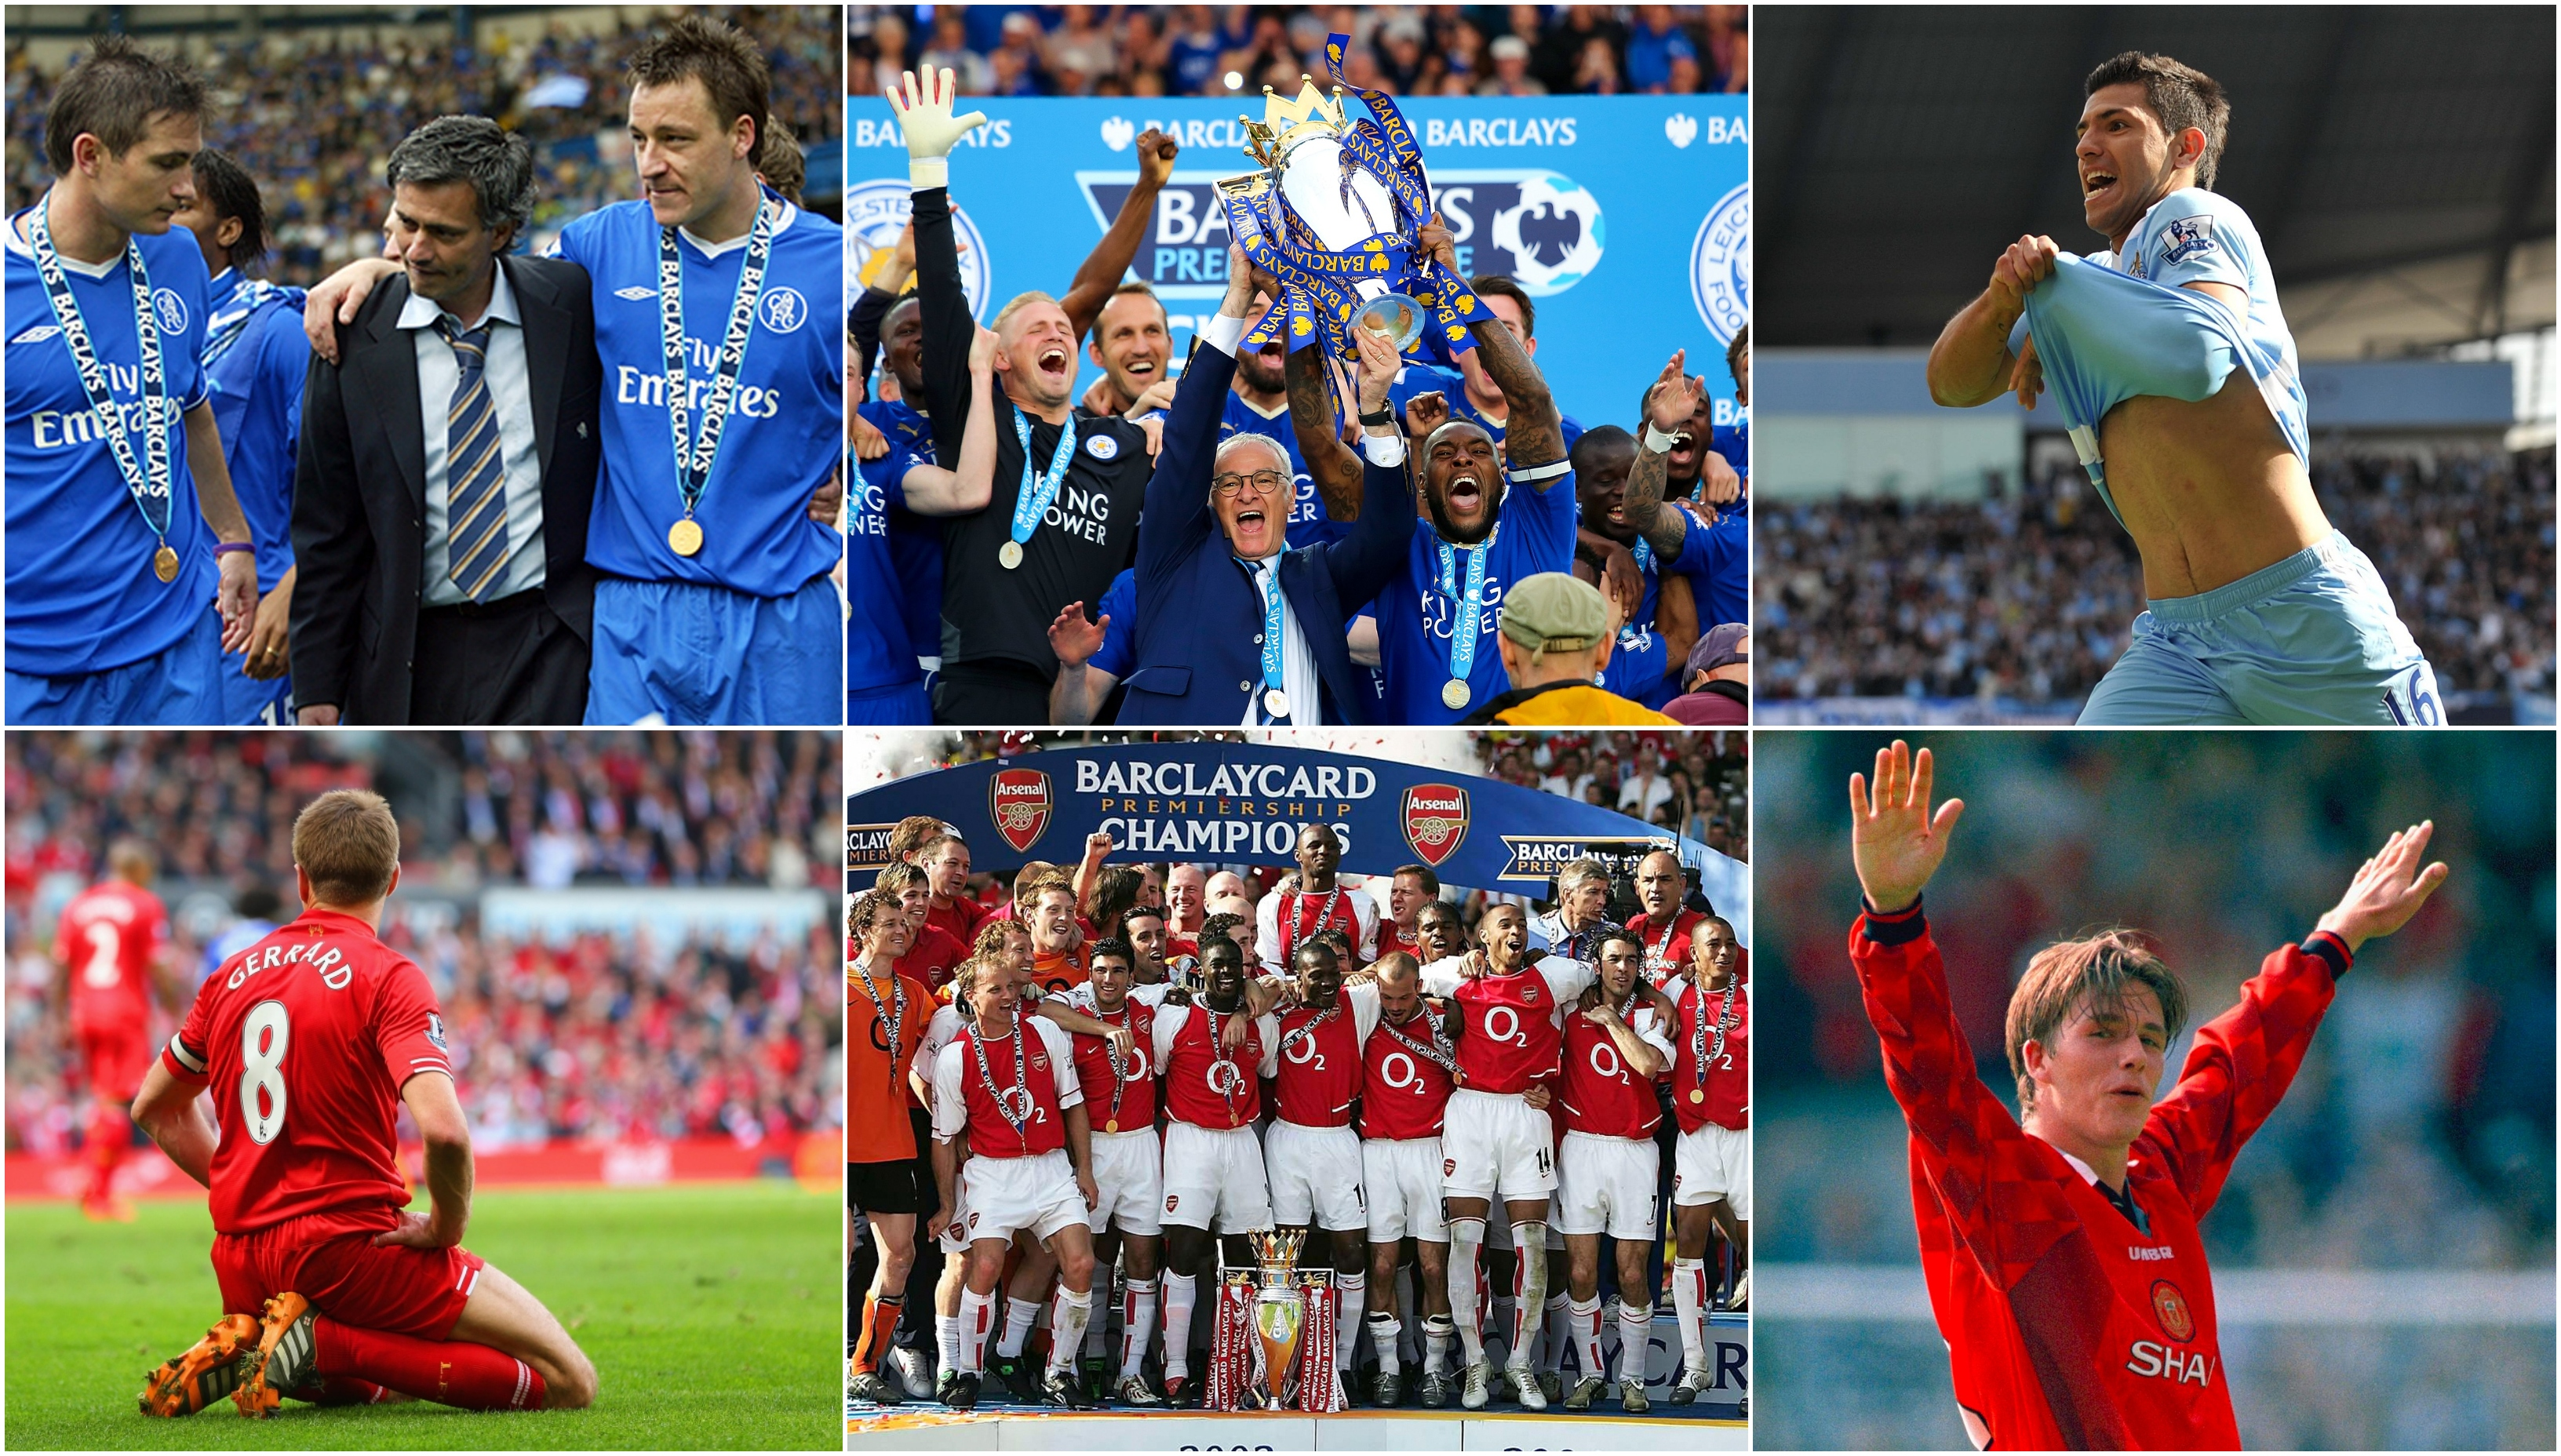







# <span style="color:black">Context</span>

This dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in the EPL and their standard stats such as Goals, Assists, xG (Expected Goals), xA (Expected Assists), Passes Attempted, Pass Accuracy and more!











# <span style="color:black">Content</span>:






















**Position**: Each player has a certain position, in which he plays. The position in this dataset are, FW - Forward, MF - Midfield, DF - Defensive, GK - Goalkeeper

**Starts**: The number of times the player was named in the starting 11 by the manager.

**Mins**: The number of minutes played by the player.

**Goals**: The number of Goals scored by the player.

**Assists**: The number of times the player has assisted other player in scoring the goal.

**Passes_Attempted**: The number of passes attempted by the player.

**PercPassesCompleted**: The number of passes that the player accurately passed to his teammate.

**xG**: Expected number of goals from the player in a match.

**xA**: Expected number of assists from the player in a match.

**Yellow_Cards**: The players get a yellow card from the referee for indiscipline, technical fouls, or other minor fouls.

**Red Cards**: The players get a red card for accumulating 2 yellow cards in a single game, or for a major foul.

















# <span style="color:black">Objectives</span>:



**1**.Amount of goals and assists                           

**2**.Goals by position on field

**3**.Assists by position on field                                                    

**4**.Amount of nationalities Premier League clubs

**5**.The oldest players

**6**.The youngest players

**7**.Average age in EPL clubs
                                                                                     
**8**.Scored goals - TOP 10 player          

**9**.Assists - TOP 10 players

**10**.Number of yellow and red card




In [3]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

#               Loading Dataset and Data Preprocessing




In [5]:
df=pd.read_csv('Dataset/EPL_20_21.csv')

df.head()

Name     Club Nationality Position  Age  Matches  Starts  Mins  \
0    Mason Mount  Chelsea         ENG    MF,FW   21       36      32  2890   
1  Edouard Mendy  Chelsea         SEN       GK   28       31      31  2745   
2    Timo Werner  Chelsea         GER       FW   24       35      29  2602   
3   Ben Chilwell  Chelsea         ENG       DF   23       27      27  2286   
4    Reece James  Chelsea         ENG       DF   20       32      25  2373   

   Goals  Assists  Passes_Attempted  Perc_Passes_Completed  Penalty_Goals  \
0      6        5              1881                   82.3              1   
1      0        0              1007                   84.6              0   
2      6        8               826                   77.2              0   
3      3        5              1806                   78.6              0   
4      1        2              1987                   85.0              0   

   Penalty_Attempted    xG    xA  Yellow_Cards  Red_Cards  
0                  1  0.21  0.24             2          0  
1                  0  0.00  0.00             2          0  
2                  0  0.41  0.21             2          0  
3                  0  0.10  0.11             3          0  
4                  0  0.06  0.12             3          0

In [14]:
#Taking a breif overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [15]:
df.shape

(532, 18)

In [16]:
#Creating two new columns before proceeding towards analysis as we would get the amount of mins played in a match by each player and the niumber of goals he has scroed in each match.

df['MinsperMatch']=(df['Mins']/df['Matches']).astype(int)
df['GoalsperMatch']=(df['Goals']/df['Matches']).astype(int)

In [17]:
df.head()

Name     Club Nationality Position  Age  Matches  Starts  Mins  \
0    Mason Mount  Chelsea         ENG    MF,FW   21       36      32  2890   
1  Edouard Mendy  Chelsea         SEN       GK   28       31      31  2745   
2    Timo Werner  Chelsea         GER       FW   24       35      29  2602   
3   Ben Chilwell  Chelsea         ENG       DF   23       27      27  2286   
4    Reece James  Chelsea         ENG       DF   20       32      25  2373   

   Goals  Assists  Passes_Attempted  Perc_Passes_Completed  Penalty_Goals  \
0      6        5              1881                   82.3              1   
1      0        0              1007                   84.6              0   
2      6        8               826                   77.2              0   
3      3        5              1806                   78.6              0   
4      1        2              1987                   85.0              0   

   Penalty_Attempted    xG    xA  Yellow_Cards  Red_Cards  MinsperMatch  \
0                  1  0.21  0.24             2          0            80   
1                  0  0.00  0.00             2          0            88   
2                  0  0.41  0.21             2          0            74   
3                  0  0.10  0.11             3          0            84   
4                  0  0.06  0.12             3          0            74   

   GoalsperMatch  
0              0  
1              0  
2              0  
3              0  
4              0

# Conclusion

We have 18 columns and 532 records without null values.So there are no quality as well as tidiness issues,hence data wrangling is not required in this case.

***

# Goals Scored in Premier League


Analyzed the total number of goals and penalty goals, as well as the percentage of goals scored on penalties and the number of penalties missed. This analysis can provide valuable insights into the performance in terms of the ability to score goals and convert penalty opportunities.

In [18]:
Total_Goals=df['Goals'].sum()
print(Total_Goals)

986


In [19]:
#Total Penalty Goals

Total_penalty_Goals=df['Penalty_Goals'].sum()
print(Total_penalty_Goals)

102


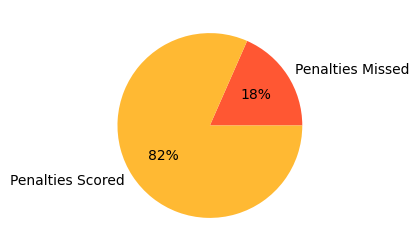

In [20]:
#Pie chart for penalty missed vs scored

plt.figure(figsize=(16,3))
pl_not_scored=df['Penalty_Attempted'].sum()-Total_penalty_Goals
data=[pl_not_scored,Total_penalty_Goals]
labels=['Penalties Missed','Penalties Scored']
color=sns.color_palette(["#FF5733", "#FFB933", "#99e2b4", "#33A2FF", "#a663cc"])
plt.pie(data,labels=labels,colors=color,autopct='%.0f%%')
plt.show()

# Conclusion

During the 20/21 EPL season, a total of 986 goals were scored, out of which 102 were from penalties. 18% of the penalties were missed. This data provides insight into the performance of teams and players in terms of scoring goals and converting penalty opportunities.

***

# Positions Analysis

The analysis includes overall trends and patterns in player positions. This information can be useful for understanding the strategies and tactics employed by different teams in the league


In [21]:
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [22]:
#Total Forward Players and Midfield PLayers

df[(df['Position']=='FW')]

Name              Club Nationality Position  Age  Matches  \
2           Timo Werner           Chelsea         GER       FW   24       35   
16        Tammy Abraham           Chelsea         ENG       FW   22       22   
19       Olivier Giroud           Chelsea         FRA       FW   33       17   
23   Ruben Loftus-Cheek           Chelsea         ENG       FW   24        1   
30      Raheem Sterling   Manchester City         ENG       FW   25       31   
..                  ...               ...         ...      ...  ...      ...   
516        Oliver Burke  Sheffield United         SCO       FW   23       25   
518     Oliver McBurnie  Sheffield United         SCO       FW   24       23   
519      Rhian Brewster  Sheffield United         ENG       FW   20       27   
523         Billy Sharp  Sheffield United         ENG       FW   34       16   
526     Daniel Jebbison  Sheffield United         ENG       FW   17        4   

     Starts  Mins  Goals  Assists  Passes_Attempted  Perc_Passes_Completed  \
2        29  2602      6        8               826                   77.2   
16       12  1040      6        1               218                   68.3   
19        8   748      4        0               217                   74.2   
23        1    60      0        0                16                   68.8   
30       28  2536     10        7              1127                   85.4   
..      ...   ...    ...      ...               ...                    ...   
516      14  1269      1        1               262                   70.6   
518      12  1324      1        0               426                   62.9   
519      12  1128      0        0               225                   69.3   
523       7   735      3        0               123                   69.9   
526       3   284      1        0                34                   70.6   

     Penalty_Goals  Penalty_Attempted    xG    xA  Yellow_Cards  Red_Cards  \
2                0                  0  0.41  0.21             2          0   
16               0                  0  0.56  0.07             0          0   
19               0                  0  0.58  0.09             1          0   
23               0                  0  0.00  0.00             0          0   
30               0                  1  0.43  0.17             4          0   
..             ...                ...   ...   ...           ...        ...   
516              0                  0  0.17  0.13             2          0   
518              0                  0  0.21  0.07             2          0   
519              0                  0  0.14  0.13             1          0   
523              2                  2  0.33  0.07             1          0   
526              0                  0  0.50  0.01             0          0   

     MinsperMatch  GoalsperMatch  
2              74              0  
16             47              0  
19             44              0  
23             60              0  
30             81              0  
..            ...            ...  
516            50              0  
518            57              0  
519            41              0  
523            45              0  
526            71              0  

[81 rows x 20 columns]

# Conclusion

In accordance with the analysis on the English Premier League 2020-21 season dataset, there are four positions in which players regularly play: FW - Forward, MF - Midfield, DF - Defensive, and GK - Goalkeeper.

 ***

# Nationalities of Players

In the 2020/21 season, there were players from countries all over the world, including England, Spain, France, Brazil, and many others. This diversity of nationalities adds to the excitement and competitiveness of the league, as players bring their unique styles and skills to the game. It’s always interesting to see how players from different countries and cultures come together to form a cohesive team and compete at the highest level.The following analysis take a broader look into the diversity in the league and which countries had the most number of players form their side in the league.


In [4]:
#Players from different Nations

nationality_counts = df['Nationality'].value_counts().reset_index()
nationality_counts.columns = ['Country', 'Count']
fig = px.choropleth(
    nationality_counts,
    locations='Country',
    locationmode='ISO-3',
    color='Count',
    color_continuous_scale='viridis',
    hover_name='Country',
    hover_data=['Count'],
)
fig.update_layout(
    width=900,
    height=600
)
# Show the map
fig.show()

<Axes: xlabel='Nationality'>

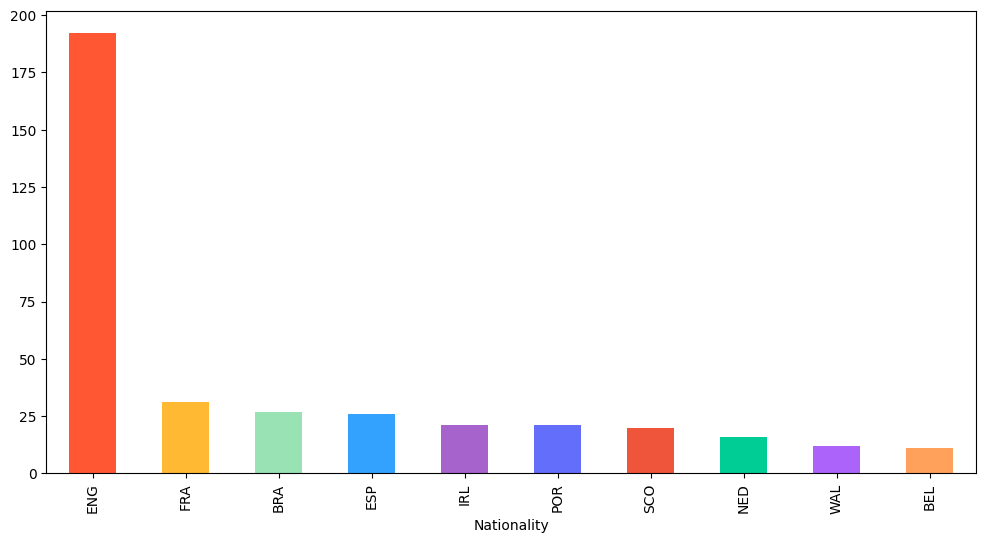

In [76]:
#Distribution of players with their countries

nationality=df.groupby('Nationality').size().sort_values(ascending=False)
nationality.head(10).plot(kind='bar',figsize=(12,6),color=sns.color_palette(["#FF5733", "#FFB933", "#99e2b4", "#33A2FF", "#a663cc", "#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A"]))


# Conclusion

According to the  analysis of the nationalities of players in the English Premier League during the 20/21 season, a total of 59 countries had their players represented in the league. England had the highest number of players, with 232 players from the country playing in the league. This data provides insight into the diversity of nationalities represented in the EPL.

***

# A Statistical Study of Player Age in Premier League Clubs

This is the analysis concerning distribution of players in the English Premier League.We find out the clubs that  have a higher squad strength than others. The number of young players in teams like Liverpool and the average age of teams in the Premier League. This data provides insight into the composition and potential of different teams in the league.

<Axes: ylabel='Club'>

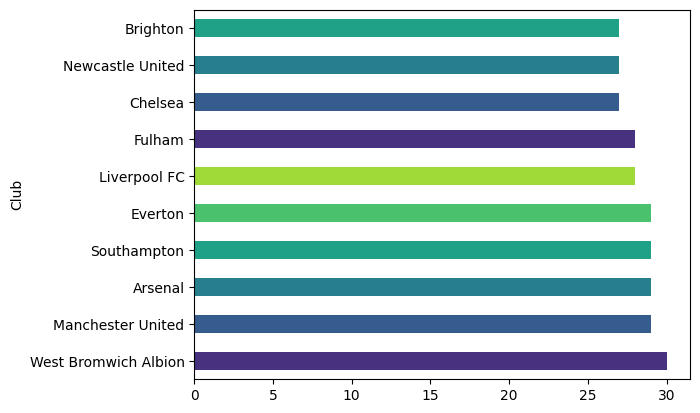

In [25]:
df['Club'].value_counts().nlargest(10).plot(kind='barh',color=sns.color_palette('viridis'))

<Axes: ylabel='Club'>

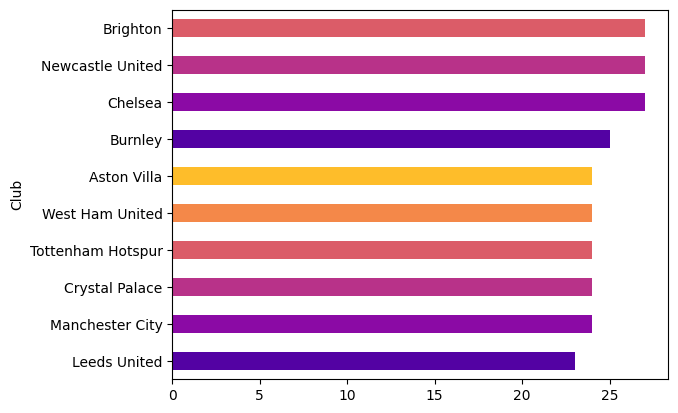

In [26]:
#Clubs with least players in their squad
df['Club'].value_counts().nsmallest(10).plot(kind='barh',color=sns.color_palette('plasma'))

In [6]:
#Players based on Age Groups

Under20=df[df['Age']<=20]
age20_25=df[(df['Age']>20) & (df['Age'])<=25]
age25_30=df[(df['Age']>25) & (df['Age'])<=30]
age30=df[df['Age']>30]

In [7]:
data = pd.DataFrame({'Age Group': ["Less than 20","Between 20 and 25","Between 25 and 30","Greater than 30"],
                     'Count': [Under20['Name'].count(), age20_25['Name'].count(), age25_30['Name'].count(), age30['Name'].count()]})

fig=px.pie(data,values='Count',names='Age Group')
fig.show()

In [8]:
#Total under 20 players in each Club

players_under_20=df[df['Age']<20]

trace=go.Bar(x=players_under_20['Club'],y=players_under_20['Club'].value_counts())

data=[trace]

layout=go.Layout(title='Total under 20 players in each club',
                 xaxis={'title':'Clubs'},
                 yaxis={'title':'Counts'})

fig=go.Figure(data=data,layout=layout)

pyo.iplot(fig)

In [30]:
#Under 20 players Liverpool Fc

players_under_20[players_under_20['Club']=='Liverpool FC']

Name          Club Nationality Position  Age  Matches  Starts  \
91    Curtis Jones  Liverpool FC         ENG       MF   19       24      13   
96   Rhys Williams  Liverpool FC         ENG       DF   19        9       7   
102  Neco Williams  Liverpool FC         WAL       DF   19        6       3   

     Mins  Goals  Assists  Passes_Attempted  Perc_Passes_Completed  \
91   1179      1        2               976                   91.2   
96    661      0        0               451                   92.0   
102   249      0        0               213                   73.2   

     Penalty_Goals  Penalty_Attempted    xG    xA  Yellow_Cards  Red_Cards  \
91               0                  0  0.11  0.12             2          0   
96               0                  0  0.07  0.05             0          0   
102              0                  0  0.03  0.10             1          0   

     MinsperMatch  GoalsperMatch  
91             49              0  
96             73              0  
102            41              0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

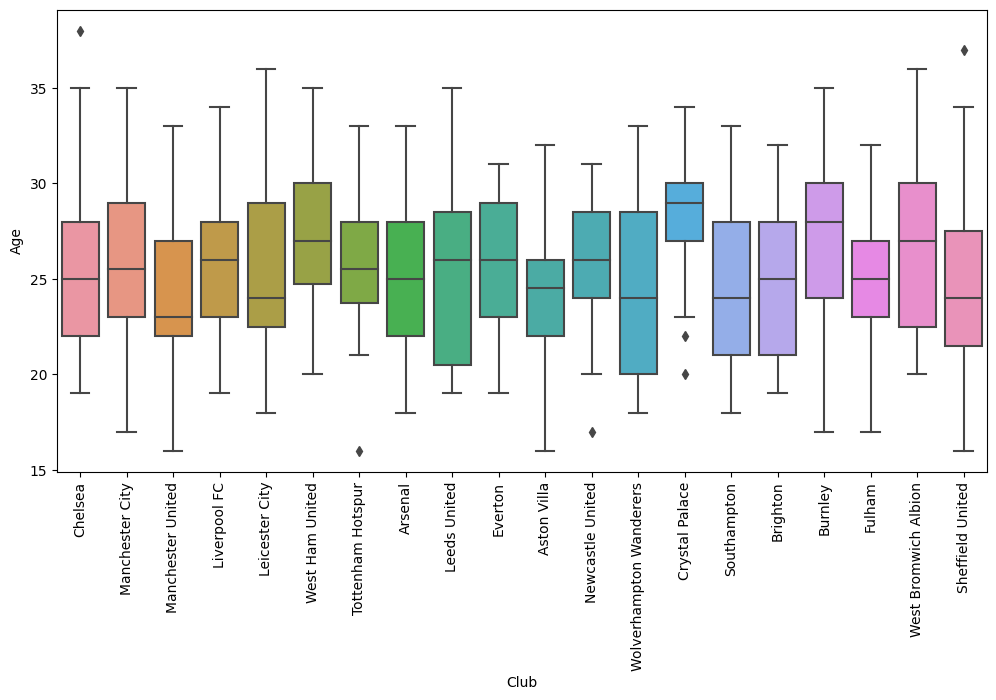

In [31]:
#Average age of players 

plt.figure(figsize=(12,6))
sns.boxplot(x='Club',y='Age',data=df)
plt.xticks(rotation=90)

# Conclusion

Manchester United has the highest number of young players out of all clubs,while their rivals liverpool only posess 3 young players.Crystal palace has the highest average age for a squad in the league.Most of the players in the league have ages in between 20-30 yrs.

***

# League Leaders in Goals and Assists



Text(0.5, 1.0, 'Plots of Clubs vs Total Assists')

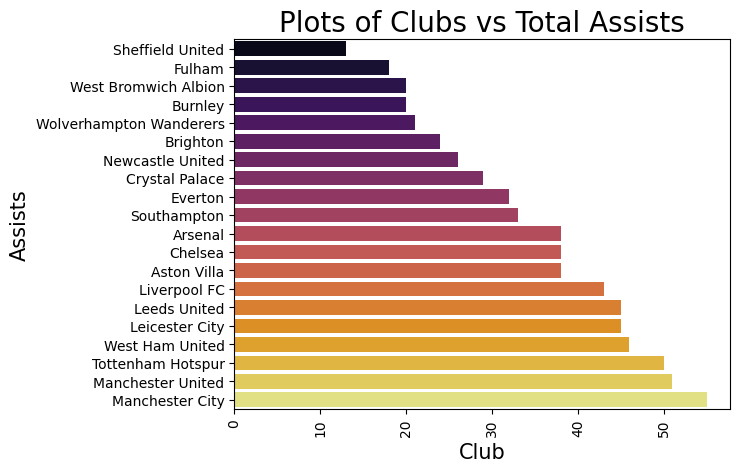

In [32]:
#Total assists by club

Assist_by_clubs=pd.DataFrame(df.groupby('Club',as_index=False)['Assists'].sum())
ax=sns.barplot(x='Assists',y='Club',data=Assist_by_clubs.sort_values(by='Assists'),palette='inferno',orient='h')
ax.set_xlabel('Club',fontsize=15)
ax.set_ylabel('Assists',fontsize=15)
plt.xticks(rotation=90)
plt.title("Plots of Clubs vs Total Assists",fontsize=20)

Text(0.5, 1.0, 'Plots of Clubs vs Goals')

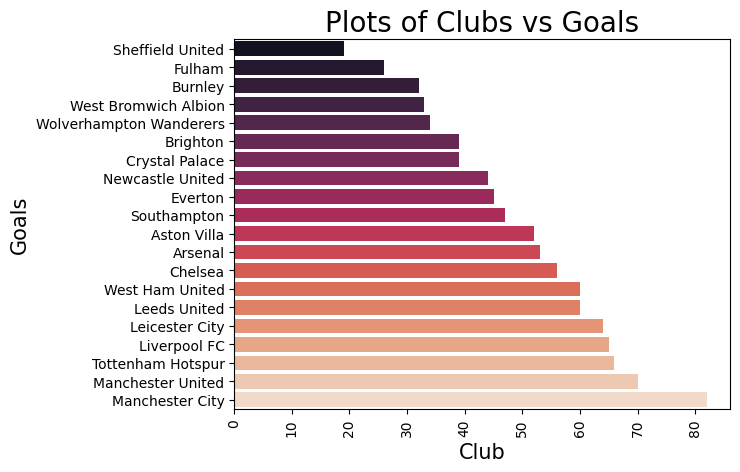

In [33]:
#Goals By Clubs

Goals_by_clubs=pd.DataFrame(df.groupby('Club',as_index=False)['Goals'].sum())
ax=sns.barplot(x='Goals',y='Club',data=Goals_by_clubs.sort_values(by='Goals'),palette='rocket',orient='h')
ax.set_xlabel('Club',fontsize=15)
ax.set_ylabel('Goals',fontsize=15)
plt.xticks(rotation=90)
plt.title("Plots of Clubs vs Goals",fontsize=20)

In [10]:
#Top 10 Assists

top_player_assists=df[['Name','Club','Assists','Matches']].nlargest(n=10,columns='Assists')
top_player_assists

Name               Club  Assists  Matches
162            Harry Kane  Tottenham Hotspur       14       35
34        Kevin De Bruyne    Manchester City       12       25
51        Bruno Fernandes  Manchester United       12       37
161         Son Heung-min  Tottenham Hotspur       10       37
273         Jack Grealish        Aston Villa       10       26
54        Marcus Rashford  Manchester United        9       37
110           Jamie Vardy     Leicester City        9       34
220  Raphael Dias Belloli       Leeds United        9       30
2             Timo Werner            Chelsea        8       35
136       Aaron Cresswell    West Ham United        8       36

In [11]:
#Plotting Players 

fig = px.treemap(
    top_player_assists,
    path=['Club', 'Name'],
    values='Assists',
    color='Assists',
    color_continuous_scale='RdBu'
)

fig.update_traces(
    marker=dict(line=dict(width=0)),
    hovertemplate='<b>%{label}</b><br>Assists: %{value}<br>',
    textinfo='label+text+value'
)

fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    treemapcolorway=['#636efa', '#EF553B', '#00cc96'],
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()


In [12]:
#Most Goals from players

top_10_goals=df[['Name','Club','Matches','Goals']].nlargest(n=10,columns='Goals')
top_10_goals

Name               Club  Matches  Goals
162             Harry Kane  Tottenham Hotspur       35     23
81           Mohamed Salah       Liverpool FC       37     22
51         Bruno Fernandes  Manchester United       37     18
161          Son Heung-min  Tottenham Hotspur       37     17
214        Patrick Bamford       Leeds United       38     17
237  Dominic Calvert-Lewin            Everton       33     16
110            Jamie Vardy     Leicester City       34     15
267          Ollie Watkins        Aston Villa       37     14
33          İlkay Gündoğan    Manchester City       28     13
191    Alexandre Lacazette            Arsenal       31     13

In [13]:
#Plottting the top 10 goal scorers

fig = px.sunburst(
    top_10_goals,
    path=['Club', 'Name'],
    values='Goals',
    color='Goals',
    color_continuous_scale='RdBu'
)

fig.update_layout(
    width=800,
    height=600
)

fig.show()

# Conclusion
Harry kane has scored the highest number of goals as well as highest number of assists. He is then followed by Mohommmad Salah who just short of 1 goal.Kevin De Bruyne has 12 assists same as that  of bruno fernandes,while jack grealish and son have 10 each. Manchester city has registered the highest number of assists and goals as a club followed by Manchester united and Tottenham Hotspurs.


***

# Yellow And Red Cards 

<Axes: title={'center': 'Players with most yellow cards'}, xlabel='Name', ylabel='Number of Yellow Cards'>

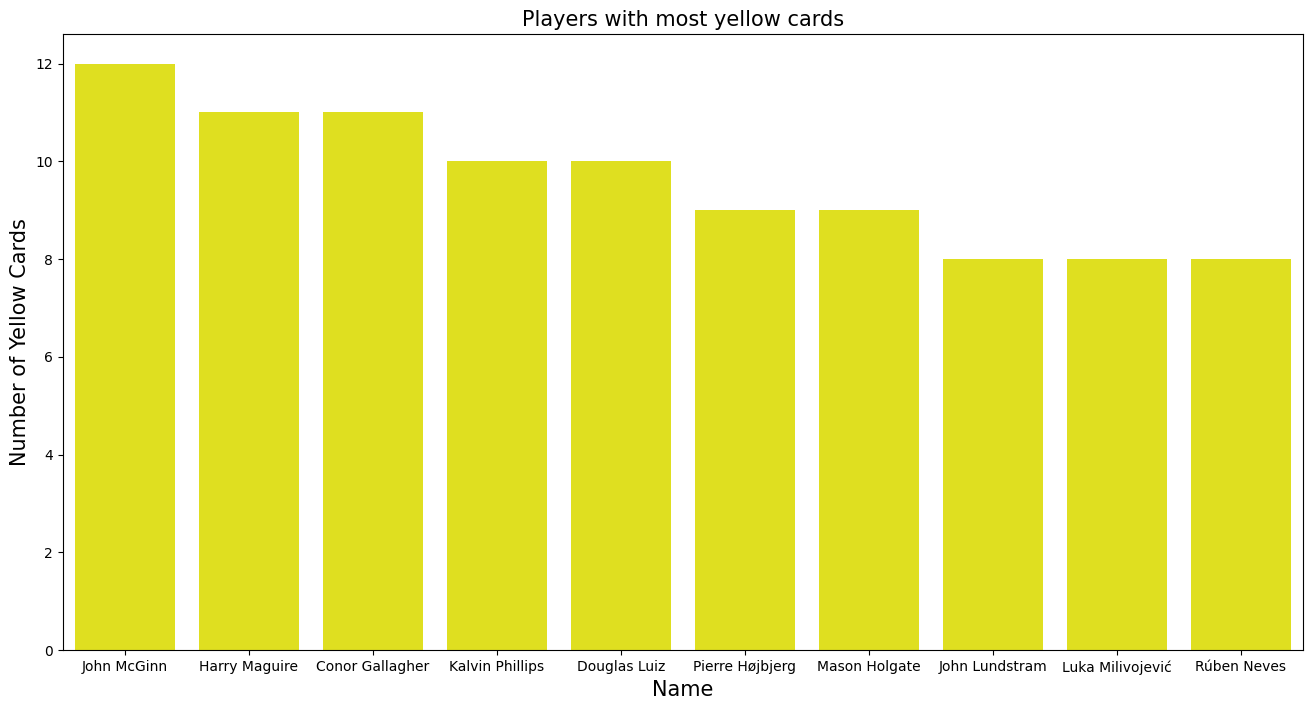

In [19]:
#Top 10 players  with most yellow cards

top_yellow_cards=df[['Name','Yellow_Cards']].sort_values(by='Yellow_Cards',ascending=False)[:10]
plt.figure(figsize=(16,8))
plt.title("Players with most yellow cards",fontsize=15)
c=sns.barplot(x=top_yellow_cards['Name'],y=top_yellow_cards['Yellow_Cards'],label='Players',color='Yellow')
plt.xlabel("Name",fontsize=15)
plt.ylabel("Number of Yellow Cards",fontsize=15)
c

<Axes: title={'center': 'Players with most Red cards'}, xlabel='Name', ylabel='Number of Red Cards'>

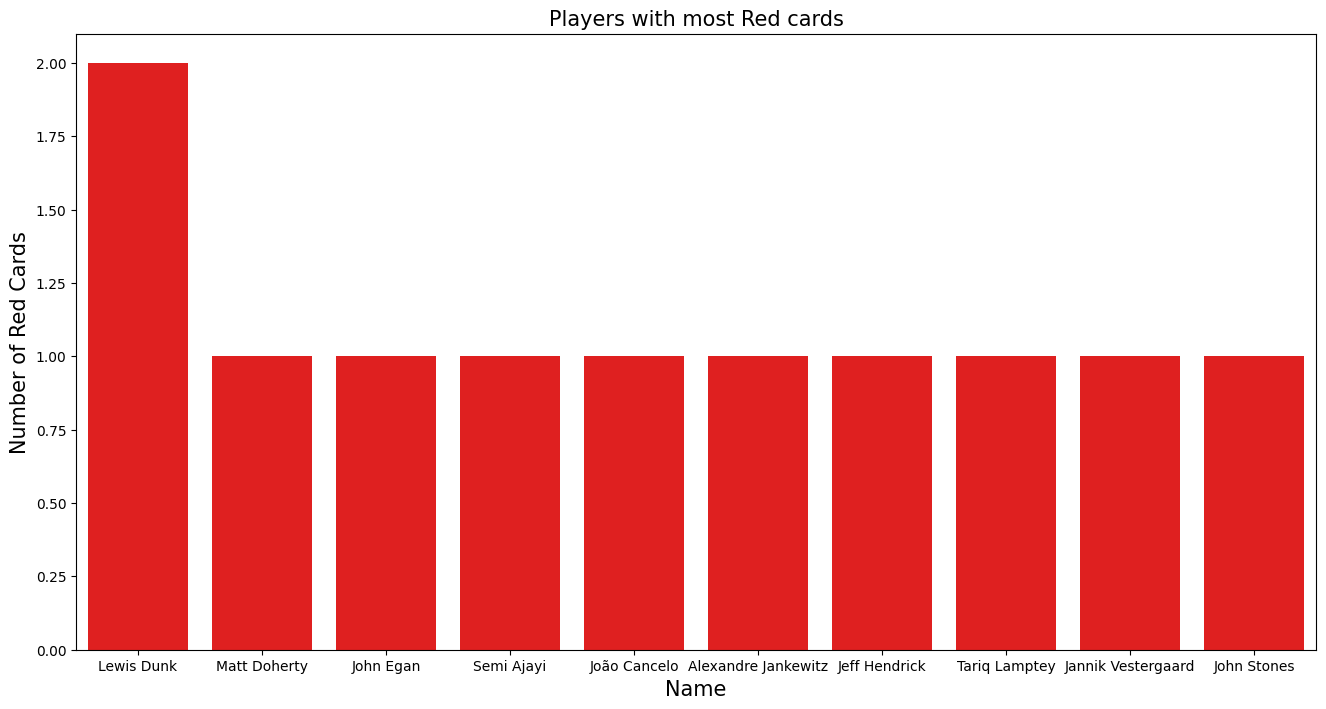

In [20]:
#Top 10 players  with most red cards

top_yellow_cards=df[['Name','Red_Cards']].sort_values(by='Red_Cards',ascending=False)[:10]
plt.figure(figsize=(16,8))
plt.title("Players with most Red cards",fontsize=15)
c=sns.barplot(x=top_yellow_cards['Name'],y=top_yellow_cards['Red_Cards'],label='Players',color='Red')
plt.xlabel("Name",fontsize=15)
plt.ylabel("Number of Red Cards",fontsize=15)
c

In [6]:
#Distribution of Cards Nationality Wise

df_2= df[['Name','Nationality','Yellow_Cards','Red_Cards']].groupby('Nationality').agg({'Yellow_Cards':'sum','Red_Cards':'sum','Name':'count'}).sort_values(by=['Yellow_Cards','Red_Cards'],ascending=False).head(15)
df_2['Total']=df_2['Yellow_Cards']+df_2['Red_Cards']
df_2

Yellow_Cards  Red_Cards  Name  Total
Nationality                                      
ENG                   402         13   192    415
BRA                    70          6    27     76
ESP                    63          1    26     64
POR                    59          2    21     61
FRA                    57          3    31     60
SCO                    51          2    20     53
IRL                    40          3    21     43
NED                    30          0    16     30
NIR                    24          0     5     24
DEN                    21          3     6     24
BEL                    20          1    11     21
ARG                    18          1     8     19
WAL                    17          0    12     17
GHA                    16          0     5     16
SEN                    16          0     5     16

In [14]:
df_2=df_2.reset_index()

trace=go.Bar(x=df_2['Nationality'],y=df_2['Yellow_Cards'])

trace1=go.Bar(x=df_2['Nationality'],y=df_2['Red_Cards'])

data=[trace,trace1]

layout=go.Layout(title='Total number of yellow and red cards',
                 xaxis={'title':'Nationality'},
                 yaxis={'title':'Cards'})
fig=go.Figure(data=data,layout=layout)

pyo.iplot(fig)

# Conclusion

English Players have recieved the highest number of yellow as well as red cards in epl,followed by brazillian players and spainsh players.African players despite being known for their aggression have recevied much less yellow as well as red cards.

# THANK YOU